## 6.4 Machine Learning Part 1

### This script contains the following:
   #### 1. Importing libraries and data
   #### 2. Data cleaning
   #### 3. Data prep for regression analysis
   #### 4. Regression analysis
   #### Bonus: performance improvement after removing outliers

### 1. Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [4]:
path = r'/Users/arunibandara/Documents/Achievenemt 6.1'

In [5]:
path

'/Users/arunibandara/Documents/Achievenemt 6.1'

### 2. Data cleaning

In [6]:
# Import the RenE_c2_wn dataset

df_REfinal = pd.read_csv(os.path.join(path, '02 Data','prepared_data', 'RenE_c2_wn2.csv'))

In [7]:
df_REfinal.columns

Index(['Country Name', 'Time', 'Access_Electracity(%)-Rural_P',
       'Access_Electracity(%)-Urban_P', 'Access_Electracity(%)-Total_P',
       'RenewableEOutput(gwh)', 'Total_Electracity_output(gwh)',
       'RenewableE/TotalE(%)', 'RenewableE_consumption(TJ)',
       'Total_final_E_consumption(TFEC)', 'Renewable_E/TFEC(%)'],
      dtype='object')

In [8]:
df_REfinal.head(5)

,Country Name,Time,Access_Electracity(%)-Rural_P,Access_Electracity(%)-Urban_P,Access_Electracity(%)-Total_P,RenewableEOutput(gwh),Total_Electracity_output(gwh),RenewableE/TotalE(%),RenewableE_consumption(TJ),Total_final_E_consumption(TFEC),Renewable_E/TFEC(%)
0,Afghanistan,1996,0.0,62.652660,0.010000,475.0,675.0,70.370370,9304.887,24521.55410,37.945748
1,Afghanistan,1997,0.0,64.409889,0.010000,485.0,670.0,72.388060,9861.213,23800.61303,41.432601
2,Afghanistan,1998,0.0,66.160934,0.021977,495.0,665.0,74.436090,10254.290,23255.34464,44.094337
3,Afghanistan,1999,0.0,67.904762,0.179635,505.0,685.0,73.722628,10765.990,20630.12407,52.185774
4,Afghanistan,2000,0.0,69.640984,0.959756,515.7,687.7,74.989094,11301.390,20834.69512,54.243126


###  2. Data cleaning

In [9]:
df_REfinal.columns

Index(['Country Name', 'Time', 'Access_Electracity(%)-Rural_P',
       'Access_Electracity(%)-Urban_P', 'Access_Electracity(%)-Total_P',
       'RenewableEOutput(gwh)', 'Total_Electracity_output(gwh)',
       'RenewableE/TotalE(%)', 'RenewableE_consumption(TJ)',
       'Total_final_E_consumption(TFEC)', 'Renewable_E/TFEC(%)'],
      dtype='object')

In [10]:
df_REfinal.shape

(5040, 11)

#### Missing value handeling 

In [11]:
# check for missing values
df_REfinal.isnull().sum()

Country Name                       0
Time                               0
Access_Electracity(%)-Rural_P      0
Access_Electracity(%)-Urban_P      0
Access_Electracity(%)-Total_P      0
RenewableEOutput(gwh)              0
Total_Electracity_output(gwh)      0
RenewableE/TotalE(%)               0
RenewableE_consumption(TJ)         0
Total_final_E_consumption(TFEC)    0
Renewable_E/TFEC(%)                0
dtype: int64

In [12]:
# No missing values to handle 

#### Duplicates check

In [13]:
dups_RE = df_REfinal.duplicated()

In [14]:
dups_RE.shape

(5040,)

In [15]:
# No duplicates to handel 

### 1. Hypothesis : 

Higher renewable energy output will directly impact sustainable energy supply to a larger population.


#### Extreme values checks

/Users/arunibandara/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Access_Electracity(%)-Total_P', ylabel='Density'>

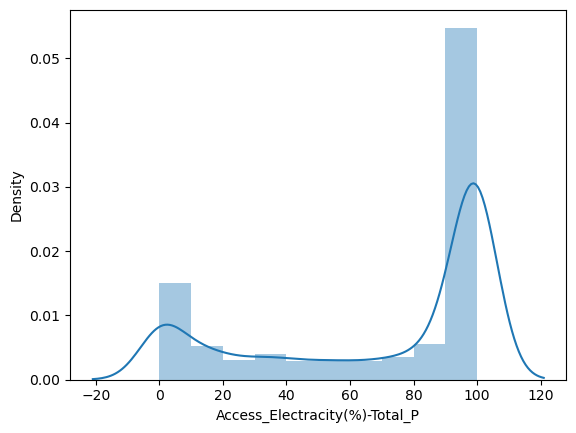

In [16]:
sns.distplot(df_REfinal['Access_Electracity(%)-Total_P'], bins=10) # Shows extreme values

In [17]:
# Eventhough it seems that there are outliers let it remain.

In [18]:
df_REfinal['Access_Electracity(%)-Total_P'].mean() # Check the mean

69.60507948602589

In [19]:
df_REfinal['Access_Electracity(%)-Total_P'].median() # Check the median

94.60341644

In [20]:
df_REfinal['Access_Electracity(%)-Total_P'].max() # Check the max

100.0

### 3. Data prep for regression analysis

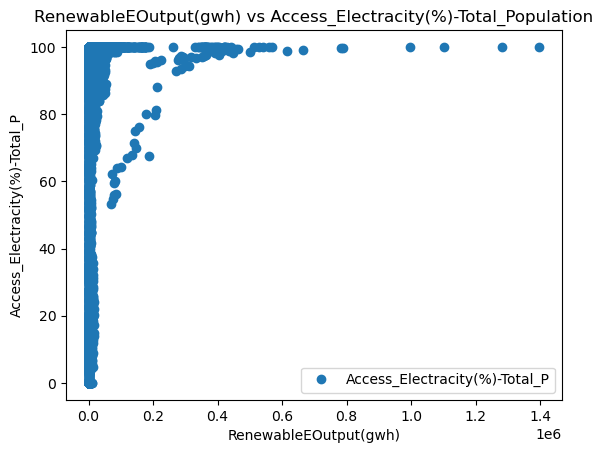

In [21]:
 # Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_REfinal.plot(x = 'RenewableEOutput(gwh)', y='Access_Electracity(%)-Total_P',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('RenewableEOutput(gwh) vs Access_Electracity(%)-Total_Population')  
plt.xlabel('RenewableEOutput(gwh)')  
plt.ylabel('Access_Electracity(%)-Total_P')  
plt.show()

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_REfinal['RenewableEOutput(gwh)'].values.reshape(-1,1)
y = df_REfinal['Access_Electracity(%)-Total_P'].values.reshape(-1,1)

In [23]:
X

array([[ 475.],
       [ 485.],
       [ 495.],
       ...,
       [5575.],
       [5119.],
       [   0.]])

In [24]:
y

array([[1.00000000e-02],
       [1.00000000e-02],
       [2.19771380e-02],
       ...,
       [3.23000000e+01],
       [3.37000000e+01],
       [3.81451378e+01]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

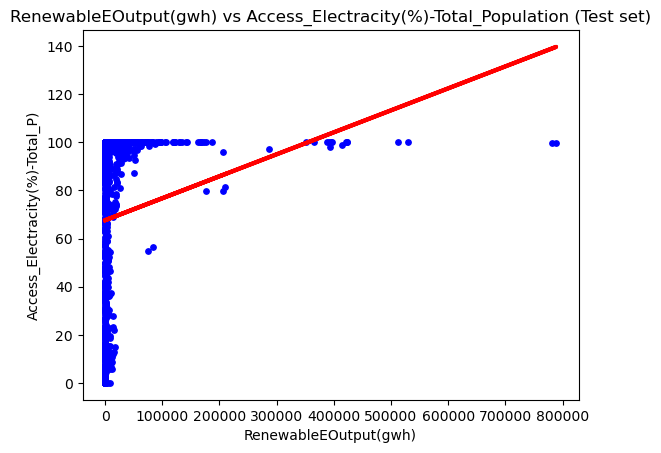

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('RenewableEOutput(gwh) vs Access_Electracity(%)-Total_Population (Test set)')
plot_test.xlabel('RenewableEOutput(gwh)')
plot_test.ylabel('Access_Electracity(%)-Total_P)')
plot_test.show()

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error

r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.13276367e-05]]
Mean squared error:  1419.6308864685689
R2 score:  0.019659723816388475


In [32]:
# Intepretation: The slope is positive, so the relationship is positive. This aligns with my hypothesis that the higher the renewable output, the higher the total population coverage with sustainable energy. The MSE is high and value is 1419.6 , so the regression line is not at all a representation of the data. Also, the R2 score of 1.0% which is a represents of a poor fit.

In [33]:
y_predicted

array([[86.81769505],
       [67.63479401],
       [67.61569412],
       ...,
       [67.67332186],
       [67.61395889],
       [67.61707043]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

Data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
Data.head(30)

,Actual,Predicted
0,81.239510,86.817695
1,100.000000,67.634794
2,100.000000,67.615694
3,97.131325,67.613959
4,92.145943,67.613959
5,100.000000,67.613959
6,97.731415,67.613959
7,0.000000,67.626087
8,100.000000,67.613959
9,98.317108,67.648389


### Compare how the regression fits the training set

In [35]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[9.13276367e-05]]
Mean squared error:  1441.6554642695417
R2 score:  0.024888692221118558


In [38]:
# Include any reflections you have on the impact of possible data bias.

# The values arealmost equal to the model. Positive relationship, extremely high MSE and a low R2. This all indicates that the model is not interpreting correct predictions of variables and hence  accessible total population coverage is not a good determinant to look for hoe renewable enrgy output impact on coverage. 
# This is true because in reality there are other important factors that would be considered in determining and would not be impact differently but not linearly.


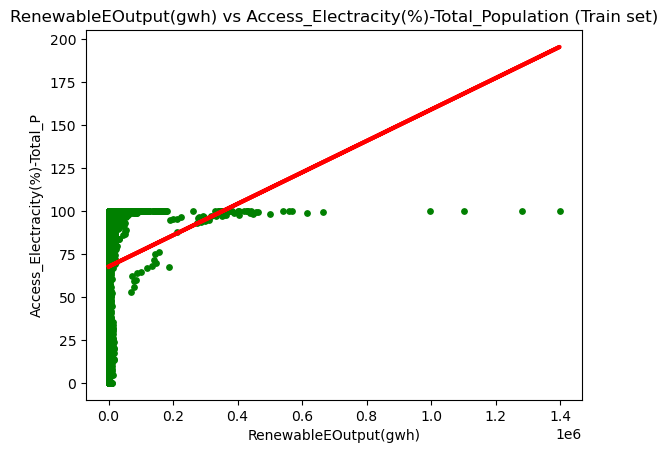

In [39]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('RenewableEOutput(gwh) vs Access_Electracity(%)-Total_Population (Train set)')
plot_test.xlabel('RenewableEOutput(gwh)')
plot_test.ylabel('Access_Electracity(%)-Total_P')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [40]:
# Clean the extreme values from the "RenewableEOutput(gwh)" variable observed during the consistency checks.

df_test = df_REfinal[df_REfinal['RenewableEOutput(gwh)'] <=0.6] 

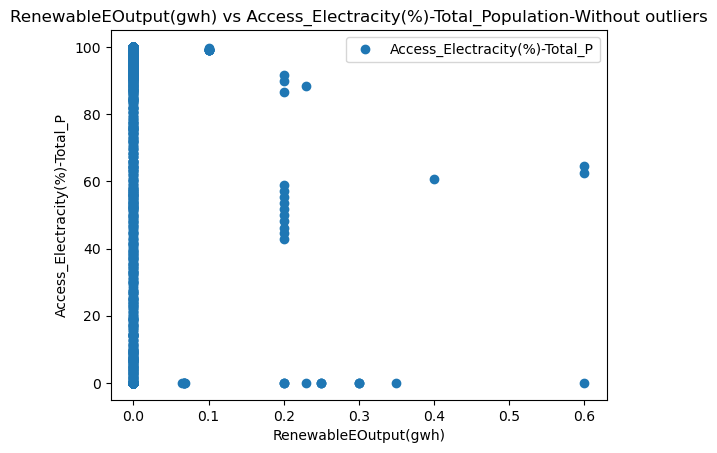

In [41]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'RenewableEOutput(gwh)', y='Access_Electracity(%)-Total_P', style='o')  
plt.title('RenewableEOutput(gwh) vs Access_Electracity(%)-Total_Population-Without outliers')  
plt.xlabel('RenewableEOutput(gwh)')  
plt.ylabel('Access_Electracity(%)-Total_P')  
plt.show()

In [42]:
# Reshape again.

X_2 = df_test['RenewableEOutput(gwh)'].values.reshape(-1,1)
y_2 = df_test['Access_Electracity(%)-Total_P'].values.reshape(-1,1)

In [43]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [44]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [45]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [46]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [47]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-69.67547558]]
Mean squared error:  1865.6479334831436
R2 score:  0.0035165356141680926


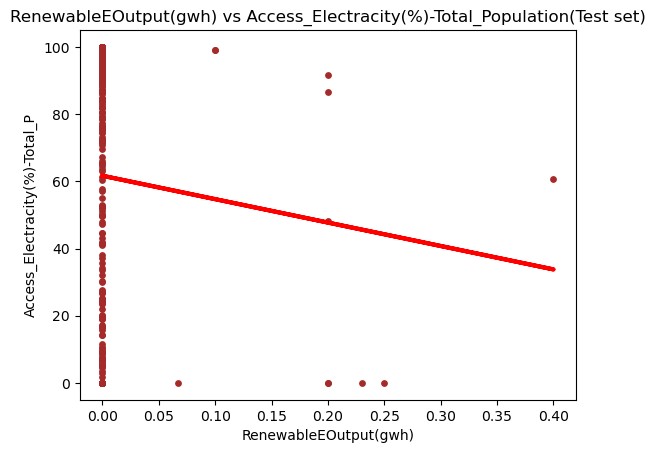

In [48]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='brown', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('RenewableEOutput(gwh) vs Access_Electracity(%)-Total_Population(Test set)')
plot_test.xlabel('RenewableEOutput(gwh)')
plot_test.ylabel('Access_Electracity(%)-Total_P')
plot_test.show()

In [49]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(20)

,Actual,Predicted
0,84.784210,61.658339
1,0.000000,61.658339
2,0.000000,61.658339
3,0.000000,61.658339
4,100.000000,61.658339
5,0.000000,61.658339
6,100.000000,61.658339
7,0.000000,61.658339
8,71.324738,61.658339
9,100.000000,61.658339


## Testing for alternative hypothesis - above not showing relationship and my further intrest in finding factors impact for coverage of electricity access for total population 

### 2. Hypothesis

Higher the consumption (optimization ) of enery from Renewable energy resources will directly impact sustainable energy distribution for the larger population.


In [50]:
df_REfinal

,Country Name,Time,Access_Electracity(%)-Rural_P,Access_Electracity(%)-Urban_P,Access_Electracity(%)-Total_P,RenewableEOutput(gwh),Total_Electracity_output(gwh),RenewableE/TotalE(%),RenewableE_consumption(TJ),Total_final_E_consumption(TFEC),Renewable_E/TFEC(%)
0,Afghanistan,1996,0.000000,62.652660,0.010000,475.0,675.0,70.370370,9304.887,24521.55410,37.945748
1,Afghanistan,1997,0.000000,64.409889,0.010000,485.0,670.0,72.388060,9861.213,23800.61303,41.432601
2,Afghanistan,1998,0.000000,66.160934,0.021977,495.0,665.0,74.436090,10254.290,23255.34464,44.094337
3,Afghanistan,1999,0.000000,67.904762,0.179635,505.0,685.0,73.722628,10765.990,20630.12407,52.185774
4,Afghanistan,2000,0.000000,69.640984,0.959756,515.7,687.7,74.989094,11301.390,20834.69512,54.243126
...,...,...,...,...,...,...,...,...,...,...,...
5035,Zimbabwe,2012,12.981644,85.306770,36.728878,5558.0,9203.0,60.393350,304744.900,390599.92790,78.019702
5036,Zimbabwe,2013,13.669918,85.351479,37.076813,5162.0,9570.0,53.939394,311169.400,391107.49370,79.561094
5037,Zimbabwe,2014,9.800000,83.400000,32.300000,5575.0,10026.0,55.605426,320293.300,395183.34350,81.049291
5038,Zimbabwe,2015,9.700000,81.200000,33.700000,5119.0,9709.0,52.724276,324422.600,396615.27090,81.797809


#### Extreme values checks

/Users/arunibandara/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Access_Electracity(%)-Total_P', ylabel='Density'>

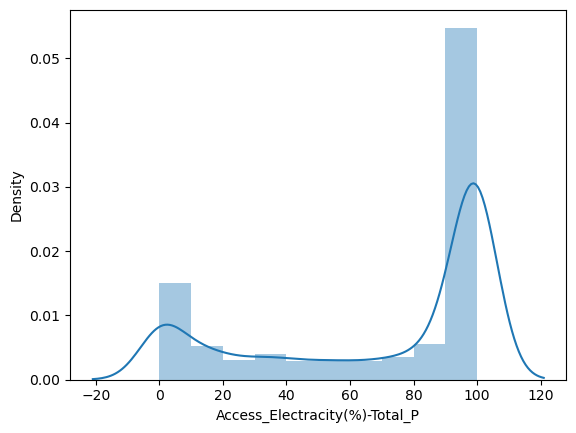

In [51]:
sns.distplot(df_REfinal['Access_Electracity(%)-Total_P'], bins=10) # Shows extreme values

In [52]:

df_REfinal['Access_Electracity(%)-Total_P'].max() # Check the max

100.0

In [53]:
df_REfinal['Access_Electracity(%)-Total_P'].median() # Check the median


94.60341644

In [54]:
df_REfinal['Access_Electracity(%)-Total_P'].mean() # Check the mean


69.60507948602589

### 3. Data prep for regression analysis

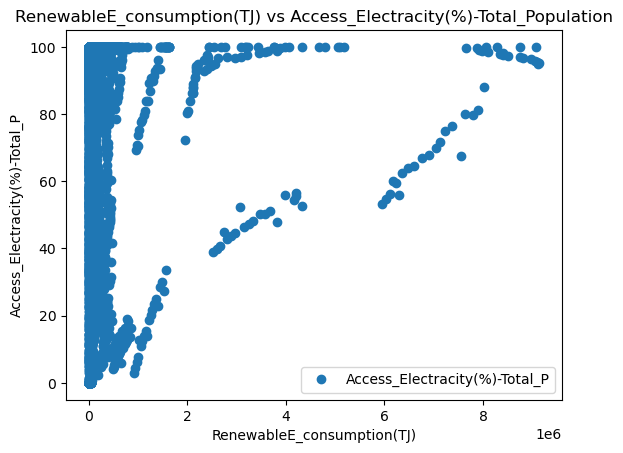

In [55]:
 # Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_REfinal.plot(x = 'RenewableE_consumption(TJ)', y='Access_Electracity(%)-Total_P',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('RenewableE_consumption(TJ) vs Access_Electracity(%)-Total_Population')  
plt.xlabel('RenewableE_consumption(TJ)')  
plt.ylabel('Access_Electracity(%)-Total_P')  
plt.show()

In [57]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_REfinal['RenewableE_consumption(TJ)'].values.reshape(-1,1)
y = df_REfinal['Access_Electracity(%)-Total_P'].values.reshape(-1,1)

In [58]:
X

array([[  9304.887],
       [  9861.213],
       [ 10254.29 ],
       ...,
       [320293.3  ],
       [324422.6  ],
       [     0.   ]])

In [59]:
y

array([[1.00000000e-02],
       [1.00000000e-02],
       [2.19771380e-02],
       ...,
       [3.23000000e+01],
       [3.37000000e+01],
       [3.81451378e+01]])

In [60]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [61]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [62]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [63]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

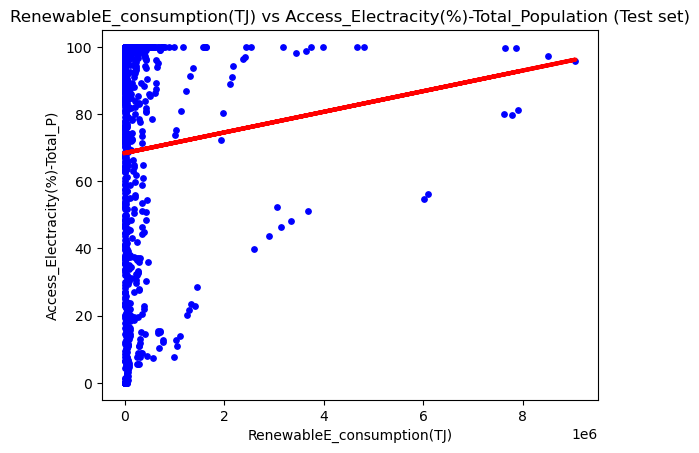

In [64]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('RenewableE_consumption(TJ) vs Access_Electracity(%)-Total_Population (Test set)')
plot_test.xlabel('RenewableE_consumption(TJ)')
plot_test.ylabel('Access_Electracity(%)-Total_P)')
plot_test.show()

In [65]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error

r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [66]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.07119979e-06]]
Mean squared error:  1449.4474352161383
R2 score:  -0.0009303914823473036


In [67]:
# Intepretation: The slope is positive, so the relationship is positive. This is aligns with my hypothesis that the higher the renewable energy consumption , the higher the total population coverage with sustainable energy. The MSE is high and value is 1449.6 , so the regression line is not at all a representation of the data. Also, the R2 score of 0.09% which is a represents of a very poor fit.

In [68]:
y_predicted

array([[92.62801158],
       [68.35818841],
       [68.43775193],
       ...,
       [68.49717415],
       [68.35586671],
       [68.3568359 ]])

In [69]:
# Create a dataframe comparing the actual and predicted values of y.

Data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
Data.head(30)

,Actual,Predicted
0,81.239510,92.628012
1,100.000000,68.358188
2,100.000000,68.437752
3,97.131325,68.356643
4,92.145943,68.356073
5,100.000000,68.358089
6,97.731415,68.355819
7,0.000000,68.357391
8,100.000000,68.355819
9,98.317108,68.368261


### Compare how the regression fits the training set

In [70]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [71]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [72]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3.07119979e-06]]
Mean squared error:  1471.77957650024
R2 score:  0.004513253566753583


## Include any reflections you have on the impact of possible data bias.

##### The values are similar to the model. A positive relationship, extremely high MSE, and a low R2. This all indicates that the model is not interpreting correct predictions of variables and hence renewable energy consumption is also not a good determinant to look for impact on electricity accessibility of total population coverage. 

##### This implies that in reality there are other important factors that would be considered in determining coverage of electricity example electricity input and consumption of other resources(fossil fuels, coal, etc. ), and also should look at how it will be impacted other than linearly.

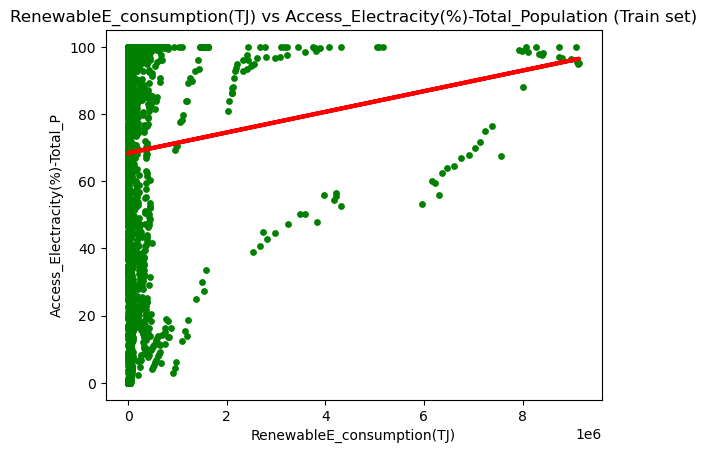

In [73]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('RenewableE_consumption(TJ) vs Access_Electracity(%)-Total_Population (Train set)')
plot_test.xlabel('RenewableE_consumption(TJ)')
plot_test.ylabel('Access_Electracity(%)-Total_P')
plot_test.show()

### Bonus: performance improvement after removing outliers

In [74]:
## I believe there are no extreme values indications and so far the model fitting there are no good or acceptable fittings to resume with further analyzing 

